<a href="https://colab.research.google.com/github/Daniel-Oduntan/FDSfE_DOduntan/blob/main/HW3/citibikes_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel FDSfE 2022


Citibikes is the shared bike services for NYC and they historically have done a great job at making their data public (while respecting people's privacy of course! well... almost always... https://www.wsj.com/articles/SB10001424127887323829104578624263439561672)

-  The "idea" is that citi bikes, which are farily bulky bikes, may be designed in such a way that they are more comfortable for larger people, and therefore, on average, for men.  

-  If the bikes are uncomfortable, the users will not use them for long trips. So to test that you can measure the trip duration for customers that are registered as male and customers that are registered as female and see (1) if they  have the same mean, and (2) if they are "the same" distribution (more precisely you will meausre if they come from the "same parent distribution"). 

-  Choose the significance threshold

-  Wrangle the data so that it is ready for your analysis.

-  Explore the data statistical properties (mean, standard deviation...)

-  Clearly state they Null and Alternate hypothesis for the first question

-  Answer the first question with a t-test

-  Clearly state they Null and Alternate hypothesis for the second question

-  Answer the second question with a ks_2sample test


-  Extra Credit: split the sample in week-days and weekends and redo the analysis for the week-days and weekend cases separately

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# IDEA:
 Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

Remember: 
### NULL HYPOTHESIS _H0_:
You want to falsify it so make it the opposite of your idea


### ALTERNATIVE HYPOTHESIS _HA_:
This shoudl be the complement of the NULL, including everything that the NULL does not




In [ ]:
pvalue = ...

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame". 

In [2]:
datestring = '201905'
cbmay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbmay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration

you know what to do!

In [8]:
#cbmay19.gender.value_counts(normalize=True)
cbmay19.groupby('gender').agg({'tripduration': ['count', 'mean']})

tripduration             
              count         mean
gender                          
0            168171  2190.584346
1           1293779   910.959352
2            462613  1095.732044

You hsould have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

Because your variable of interest is "tripduration" explore this variable in some more detail. 

## Plot the trip duration distribution

hint: when I say plot the distribution generally that means make a histogram


In [3]:
# your code here
df = cbmay19[cbmay19['gender'] != 0][['gender', 'tripduration']]

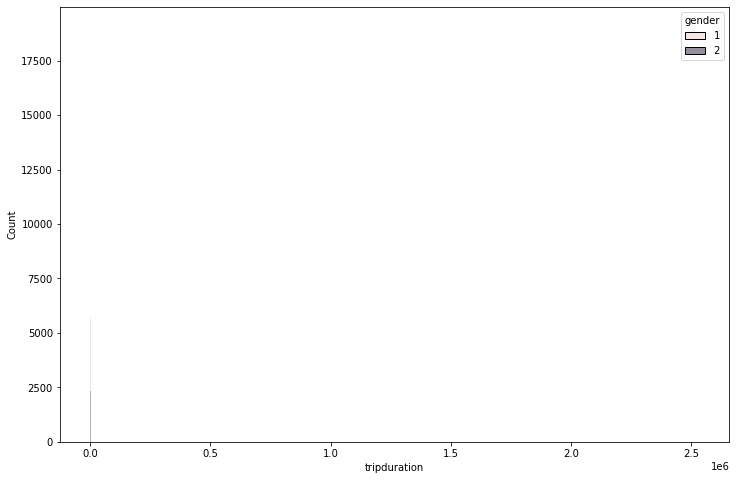

In [12]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tripduration', hue='gender')
plt.show()

Figure 1:. ...

there are some really large numbers... trips that last >1000000 minutes...  clearly this is a data curation issue. 

You need to clean the data by removin all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


You can do it by setting the condition 

```cbMay19["tripduration"] < ...```

and using this condition as an index

```cbMay19_clean = cbMay19[cbMay19["tripduration"]....```

Remake the histogram, now the sahape of the tripduration distribution should be much clearer

In [4]:
# your code here
df = df[df['tripduration'] < 1440]
df['gender'] = np.where(df['gender']==1, 'Male', 'Female')

In [25]:
df.groupby('gender').agg({'tripduration': ['count', 'mean']})

tripduration            
              count        mean
gender                         
Female       376590  652.176014
Male        1121342  588.207091

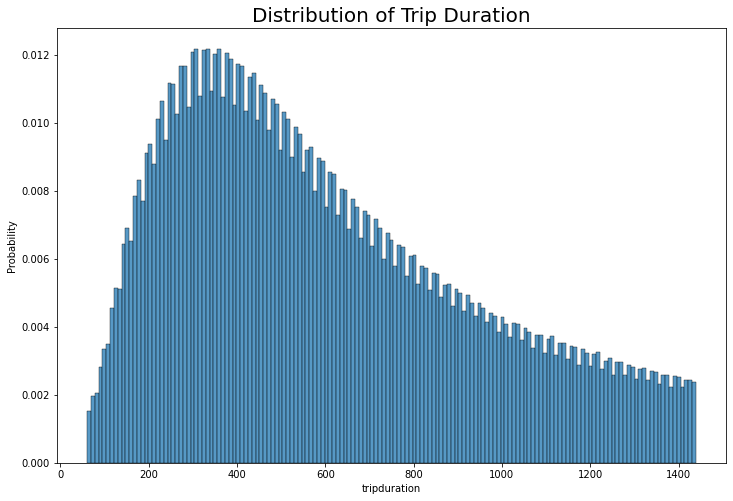

In [29]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tripduration', stat = 'probability')
plt.title('Distribution of Trip Duration', size=20)
plt.show()

Figure 2: ...

# Data Wrangling 

Split the data into two dataframes by gender
save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes. Again you can do it by setting a condition on the column ```["gender"]```

In [5]:
m = df[df['gender']=='Male']
f = df[df['gender']=='Female']

## plot the trip duration distributions for gender=2 and gender=1



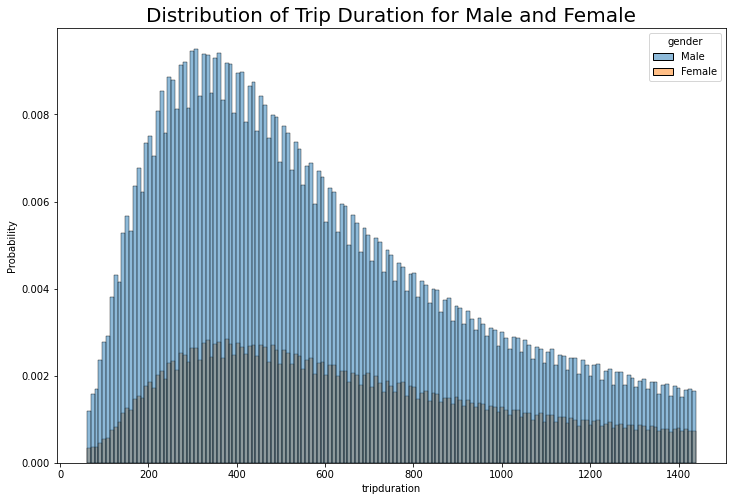

In [30]:
# your code here
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tripduration', hue='gender', stat = 'probability')
plt.title('Distribution of Trip Duration for Male and Female', size=20)
plt.show()

Figure 3:...

Notice how the histograms are differnt hights: one of the two categories has a lot more trips than the other one. Figure out which and discuss it in the caption

# Statistical analysis
Run two statistical tests: the t-test and the KS-test. 


# Check if the mean of the samples is the same

Your Null hypothesis _H0_ and Alternative hypotehsis _HA_ are respectively:

H0: µ1 = µ2 (the two sample means are equal)

HA: µ1 ≠µ2 (the two sample means are not equal)

First look at the data summary statistics: are the means the same number? are the means contained within each other's standard deviations --- i.e. is 

_mean1 > mean2 - std2 and mean1 < mean2 + std2_ 

or 

_mean2 > mean1 - std1 and mean2 < mean1 + std1_ 

this will set some expextation.





In [7]:
print(f"The mean of the trip duration for males is {round(m.tripduration.mean())}, while that of females is {round(f.tripduration.mean())}")

The mean of the trip duration for males is 588, while that of females is 652


In [11]:
m.tripduration.var(), f.tripduration.var(), m.tripduration.std(), f.tripduration.std()

(112244.99643310466, 116983.91941329079, 335.0298440931862, 342.0291207094665)

The mean of the trip duration for male and female are not equal. Although, they have similar variance and standard deviation.



To answer the question more formally  test you can use the t-test. You can use the ```ttest_ind`` function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [9]:
# get the usage information for the function here or on the webpage of the function
?stats.ttest_ind

In [12]:
# your code here
tstatistic, pvalue = stats.ttest_ind(m['tripduration'], f['tripduration'])

In [14]:
pvalue, tstatistic

(0.0, -100.84403665697793)

interpret the result based on your chosen confidence threshold and on the results of the ```ttest_ind`` function.



The chosen confidence interval for this experiment is 95%. Since the pvalue of the experiment is less than 0.05, this means that we have enough eveidence to reject the null hypothesis which say there is no difference in the mean of the trip duration of male and female. That is, the difference in mean we saw earlier is statististically signiificant.


# Are the sample coming from the same parent distribution

The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





***Null Hupothesi***s: There is no difference in the mean trip duration of male and female

***Alternate hypothesis***: There is a significant differenc ebetween the mean trip duration of male and female

Run the test ```stats.ks_2samp```

In [16]:
# your code here
tstat, p_value = stats.ks_2samp(m['tripduration'], f['tripduration'])

In [17]:
p_value

0.0

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

In [18]:
normed_f = (f["tripduration"] - f["tripduration"].mean()) / f["tripduration"].std()
normed_m = (m["tripduration"] - m["tripduration"].mean()) / m["tripduration"].std()

rerun the test after normalizing, did the conclusion change?

In [20]:
# your code here
_, pvalue = stats.ttest_ind(normed_m, normed_f)

In [21]:
pvalue

0.9999999999999769

# Extra Credit : do the same for week days only and weekends only

Pandas uses an excellent package to process dates! the datetime package

The current date columns are starttime and stoptime. You can convert starttime, which is currently a column containing simple strings, to a python datetime variable as follows



In [ ]:
cbMay19["starttime"]

In [ ]:
cbMay19["tripdate"] = pd.to_datetime(cbMay19.starttime)
cbMay19["tripdate"]

Once you have a datetime column for the start of the trip you can separate week days and weekends using the condition 

```cbMay19["tripdate"].dt.weekday < 5```

for weekdays and 

```cbMay19["tripdate"].dt.weekday >= 5```

for weekends. 

With the dataset separate in weekend and weekdays you can ask the same kind of questions: is trip duration characteristically different on weekends than on week days, or, are the gender-based differences you found for the overall sample the same for weekdays and weekends?
